In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
train_path ='ANN/train'

In [3]:
valid_path = 'ANN/valid'

In [4]:
test_path = 'ANN/test'

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, classes=['dog','cat'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, classes=['dog','cat'],batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, classes=['dog','cat'],batch_size=10)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [6]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [11]:
imgs, labels = next(train_batches)

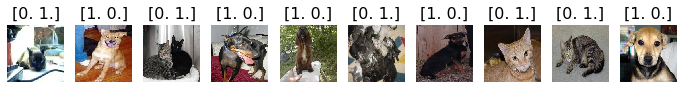

In [12]:
plots(imgs,titles=labels)